## **Decision Tree**

### **Import necessary libraries**

In [1]:
import os 
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

### **Prepare train, test data**

In [2]:
train_df = pd.read_csv('../data/train_data.csv')
test_df = pd.read_csv('../data/test_data.csv')

In [3]:
X_train = train_df.drop(columns=['diabetes'])
y_train = train_df['diabetes']
X_test = test_df.drop(columns=['diabetes'])
y_test = test_df['diabetes']

### **Initialize model**

In [4]:
model = DecisionTreeClassifier(random_state=42)

In [5]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
y_pred = model.predict(X_test)

In [7]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], shape=(19994,))

Accuracy:  0.9550865259577873
Recall:  0.74
Precision:  0.733955659276546
F1 Score:  0.7369654364381957


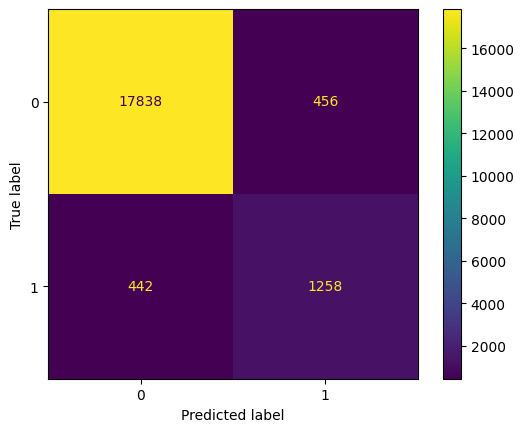

In [8]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### **Fine-tune hyperparameters**

In [9]:
finetuned_model = DecisionTreeClassifier(random_state=42)

In [10]:
# params_grid = {
#     "criterion": ["gini"],
#     "splitter": ["best", "random"],
#     "max_depth": [None, 5, 8, 12, 16, 20],
#     "min_samples_split": [2, 5, 10, 20],
#     "min_samples_leaf": [2, 5, 10, 20],
#     "max_features": [None, "sqrt", "log2"],   
#     "max_leaf_nodes": [None, 20, 50, 100, 200],
#     "class_weight": [None, "balanced"],
# }

# grid = GridSearchCV(finetuned_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
# grid.fit(X_train, y_train)

In [11]:
# print("Best parameters:", grid.best_params_)
# print("Best CV score:", grid.best_score_)

We found the best prams is `{'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}`

In [12]:
best_model = DecisionTreeClassifier(
    class_weight=None,
    criterion="gini",
    max_depth=8,
    max_features=None,
    max_leaf_nodes=20,
    min_samples_leaf=2,
    min_samples_split=2,
    splitter="best",
    random_state=42,
)

In [13]:
best_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,20
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
best_y_pred = best_model.predict(X_test)

Accuracy:  0.9722416725017505
Recall:  0.6735294117647059
Precision:  1.0
F1 Score:  0.804920913884007


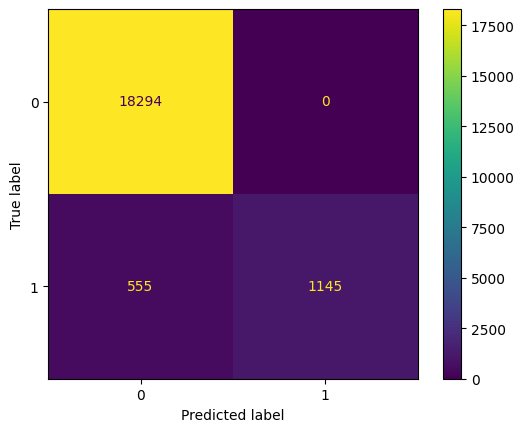

In [15]:
print("Accuracy: ", accuracy_score(y_test, best_y_pred))
print("Recall: ", recall_score(y_test, best_y_pred))
print("Precision: ", precision_score(y_test, best_y_pred))
print("F1 Score: ", f1_score(y_test, best_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_y_pred)).plot()